In [12]:
import sys
if "../" not in sys.path: sys.path.append("../")

import os
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from tqdm.notebook import tqdm

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys.visualization import plot_mean_waveforms, plot_spike_counts, raster_plot
from allensdk.brain_obseråvatory.visualization import plot_running_speed

In [2]:
drive_path = r"/Users/chase/Desktop/MindScope/ecephys-cache"
manifest_file = os.path.join(drive_path, "manifest.json")
cache = EcephysProjectCache(manifest=manifest_file)

In [38]:
sessions = cache.get_session_table()

print('Total number of sessions: ' + str(len(sessions)))

sessions.head(-1)

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"
739448407,2019-10-03T00:00:00Z,716813543,brain_observatory_1.1,112.0,M,wt/wt,625,2221,6,"[grey, VISam, nan, VIS, VISp, VISl, VISrl]"
742951821,2019-10-03T00:00:00Z,723627604,brain_observatory_1.1,120.0,M,wt/wt,893,2219,6,"[VISal, nan, grey, VISl, VISrl, VISp, VISpm, VIS]"
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."
744228101,2019-10-03T00:00:00Z,719817805,brain_observatory_1.1,122.0,M,wt/wt,659,2226,6,"[Eth, TH, LP, POL, APN, DG, CA1, VIS, nan, CA3..."


In [9]:
filtered_sessions = sessions[(sessions.sex == 'M') & \
                             (sessions.full_genotype.str.contains("Sst")) & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['VISl' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

filtered_sessions.head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
756029989,2019-10-03T00:00:00Z,734865738,brain_observatory_1.1,96.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,684,2214,6,"[TH, DG, CA3, CA1, VISl, nan, PO, Eth, LP, VIS..."


Choose an arbitrary session

In [13]:
session_id = 756029989
session = cache.get_session_data(session_id)

In [45]:
# from experiment.cre_line import match_cre_line, ALL_CRE_LINES, CreLine

sessions["full_genotype"].value_counts()

wt/wt                                              30
Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt      12
Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt     8
Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt       8
Name: full_genotype, dtype: int64

In [46]:
cache.get_session_data(sessions.index[0])

Downloading:   1%|          | 17.4M/2.86G [00:10<22:51, 2.07MB/s]

KeyboardInterrupt: 

In [14]:
units = session.units

print('Total number of units: ' + str(len(units)))
units.head()

Total number of units: 684


,L_ratio,presence_ratio,d_prime,waveform_halfwidth,cluster_id,firing_rate,peak_channel_id,silhouette_score,waveform_repolarization_slope,waveform_amplitude,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951814884,0.024771,0.99,3.555518,0.096147,6,9.492176,850126382,0.033776,0.673650,187.434780,...,215.0,APN,8162.0,3487.0,6737.0,probeA,See electrode locations,29999.949611,1249.9979,True
951814876,0.001785,0.99,4.445414,0.206030,5,39.100557,850126382,0.108908,0.518633,129.686505,...,215.0,APN,8162.0,3487.0,6737.0,probeA,See electrode locations,29999.949611,1249.9979,True
951815032,0.035654,0.99,3.848256,0.096147,17,28.383277,850126398,0.096715,0.766347,207.380940,...,215.0,APN,8129.0,3419.0,6762.0,probeA,See electrode locations,29999.949611,1249.9979,True
951815275,0.016783,0.99,3.065938,0.096147,30,5.709358,850126416,0.144249,0.628944,158.158650,...,215.0,APN,8095.0,3349.0,6787.0,probeA,See electrode locations,29999.949611,1249.9979,True
951815314,0.009666,0.99,4.198612,0.123618,34,23.902235,850126420,0.111106,0.740222,173.475705,...,215.0,APN,8088.0,3333.0,6792.0,probeA,See electrode locations,29999.949611,1249.9979,True


Get the running speed information

In [25]:
stim_epochs = session.get_stimulus_epochs()
stim_epochs

,start_time,stop_time,duration,stimulus_name,stimulus_block
0,24.429348,84.496188,60.066840,spontaneous,null
1,84.496188,996.491813,911.995625,gabors,0
2,996.491813,1285.483398,288.991585,spontaneous,null
3,1285.483398,1583.982946,298.499548,flashes,1
4,1583.982946,1585.734418,1.751472,spontaneous,null
5,1585.734418,2185.235561,599.501143,drifting_gratings,2
6,2185.235561,2216.261498,31.025937,spontaneous,null
7,2216.261498,2816.763498,600.502000,natural_movie_three,3
8,2816.763498,2846.788598,30.025100,spontaneous,null
9,2846.788598,3147.039578,300.250980,natural_movie_one,4


In [31]:
exp_start, exp_end = stim_epochs.iloc[0]["start_time"], stim_epochs.iloc[-1]["stop_time"]
exp_start, exp_end

(24.429347986361194, 9152.076027986364)

In [17]:
session.running_speed

,start_time,end_time,velocity
0,24.37776,24.39337,12.777751
1,24.39337,24.41040,8.401484
2,24.42658,24.44328,6.234442
3,24.44328,24.46028,8.180168
4,24.47657,24.49327,11.104375
...,...,...,...
365383,9211.93997,9211.95664,56.253927
365384,9211.95664,9211.97343,56.706055
365385,9211.99004,9212.00671,57.142214
365386,9212.00671,9212.02344,58.188121


full genotype: Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
mean running speed: 17.1663455184252
fraction spent running: 0.5574621767253254


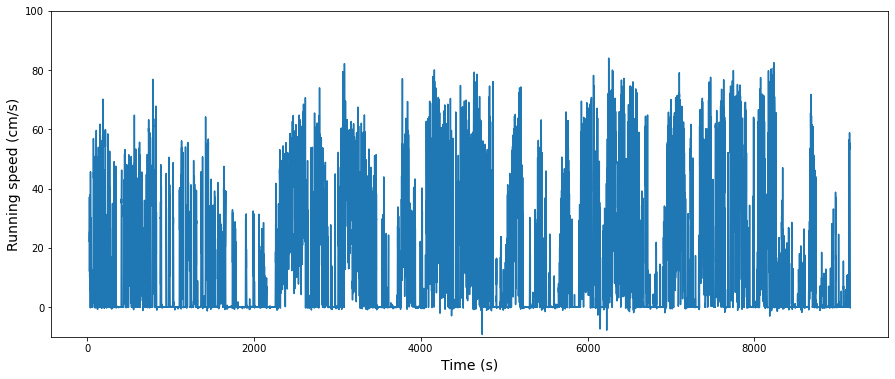

In [50]:
mask = (exp_start <= session.running_speed["start_time"]) & (session.running_speed["end_time"] <= exp_end)
running_speed_midpoints = session.running_speed["start_time"] + (session.running_speed["end_time"] - session.running_speed["start_time"]) / 2
times, run_speeds = running_speed_midpoints[mask], session.running_speed["velocity"][mask]

"""
Filter used to smooth the running speed trace.
"""
from scipy import signal, ndimage
def smooth_run_speed(data, method="gaussian"):
    if method == "savgol":
        return signal.savgol_filter(data, 51, 3)
    elif method == "gaussian":
        return ndimage.filters.gaussian_filter1d(data, 10)
    else:
        return None

run_speeds = smooth_run_speed(run_speeds)
fig, ax = plt.subplots(figsize=(15, 6), facecolor="white")
ax.plot(times, run_speeds)
ax.set_xlabel("Time (s)", fontsize=14)
ax.set_ylabel("Running speed (cm/s)", fontsize=14)
ax.set_ylim(-10, 100)

print("full genotype:", session.full_genotype)
print("mean running speed:", run_speeds.mean())
print("fraction spent running:", (run_speeds > 0.5).mean())

Find the units in V1 (and have a low number of violations)

In [7]:
V1_units = units[(units.ecephys_structure_acronym == 'VISp') & (units.isi_violations < 0.1)]

print('Total number of low-contamination V1 units: ' + str(len(V1_units)))
V1_units.head()

Total number of low-contamination V1 units: 35


,L_ratio,presence_ratio,d_prime,waveform_halfwidth,cluster_id,firing_rate,peak_channel_id,silhouette_score,waveform_repolarization_slope,waveform_amplitude,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951810369,0.053450,0.99,3.578593,0.206030,131,5.595007,850125488,-0.008220,0.216118,83.823675,...,385.0,VISp,8860.0,1387.0,7831.0,probeC,See electrode locations,29999.905275,1249.996053,True
951810338,0.013016,0.99,4.067453,0.233501,128,6.034558,850125486,0.155323,0.185828,65.479440,...,385.0,VISp,8858.0,1397.0,7830.0,probeC,See electrode locations,29999.905275,1249.996053,True
951810425,0.018436,0.99,4.238960,0.164824,136,18.240085,850125500,-0.001033,0.692030,150.832890,...,385.0,VISp,8871.0,1324.0,7837.0,probeC,See electrode locations,29999.905275,1249.996053,True
951812218,0.037290,0.99,2.817388,0.164824,296,3.790030,850125498,0.092064,0.219161,89.132550,...,385.0,VISp,8869.0,1334.0,7836.0,probeC,See electrode locations,29999.905275,1249.996053,True
951810459,0.000298,0.99,5.402746,0.096147,139,5.216888,850125502,0.159981,0.388193,126.720555,...,385.0,VISp,8873.0,1313.0,7838.0,probeC,See electrode locations,29999.905275,1249.996053,True


Retrieve the spike times for the first unit

In [8]:
unit_id = V1_units.index.values[0]
# session.spike_times
spikes = next(iter(session.spike_times.values()))
spikes[abs(spikes - 10) < 3]

/opt/anaconda3/envs/mindscope/lib/python3.7/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:1093: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',"


array([ 7.10436448,  7.39789797,  8.57829858,  9.3047323 , 10.92713315,
       11.96133369])

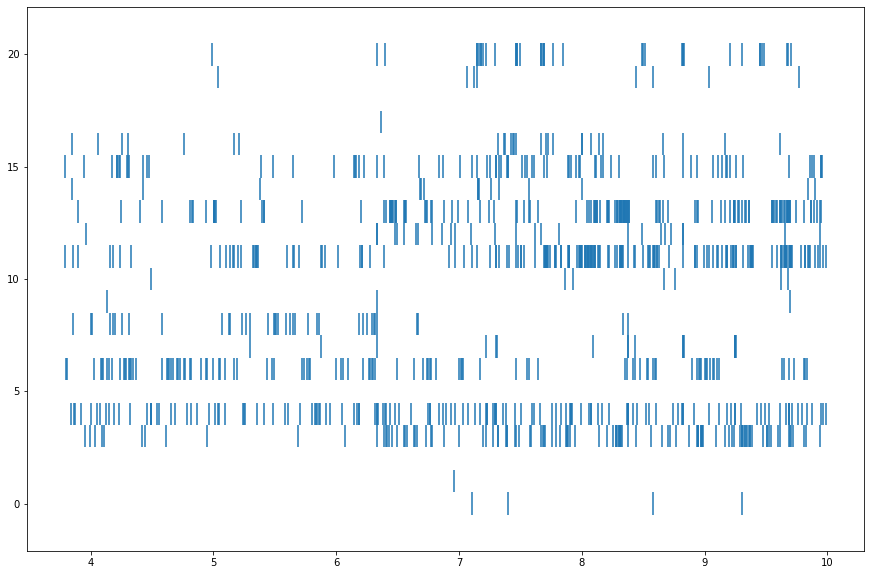

In [9]:
times = []

for spikes in session.spike_times.values():
    times.append(spikes[spikes < 10])
    
    if len(times) > 20:
        break

plt.figure(figsize=(15, 10))
plt.eventplot(times)

## Get eye tracking data

In [10]:
from eye_movements.eye_tracking import get_saccades_from_gaze_traces, get_eye_speed, get_eye_speed_outlier_threshold, get_valid_saccades_from_gaze

In [11]:
gaze_data = session.get_screen_gaze_data()
gaze_data.head()

,raw_eye_area,raw_pupil_area,raw_screen_coordinates_x_cm,raw_screen_coordinates_y_cm,raw_screen_coordinates_spherical_x_deg,raw_screen_coordinates_spherical_y_deg
Time (s),,,,,,
3.20620,0.072246,0.008627,3.192181,0.863288,11.996034,3.294251
3.22948,0.072116,0.008734,3.103325,0.916339,11.669031,3.496204
3.23714,0.072292,0.008807,3.116553,0.919020,11.717276,3.506406
3.27028,0.072347,0.008060,3.107700,1.061316,11.677819,4.047634
3.30396,0.072026,0.008814,3.285226,0.929605,12.331983,3.546691


In [12]:
gaze_data = gaze_data.copy()
x_deg_col = "raw_screen_coordinates_spherical_x_deg"
y_deg_col = "raw_screen_coordinates_spherical_y_deg"
speed_x, speed_y, speed = get_eye_speed(gaze_data, x_deg_col=x_deg_col, y_deg_col=y_deg_col)
gaze_data["speed_x"] = speed_x
gaze_data["speed_y"] = speed_y
gaze_data["speed"] = speed
gaze_data.head()

,raw_eye_area,raw_pupil_area,raw_screen_coordinates_x_cm,raw_screen_coordinates_y_cm,raw_screen_coordinates_spherical_x_deg,raw_screen_coordinates_spherical_y_deg,speed_x,speed_y,speed
Time (s),,,,,,,,,
3.20620,0.072246,0.008627,3.192181,0.863288,11.996034,3.294251,NaN,NaN,NaN
3.22948,0.072116,0.008734,3.103325,0.916339,11.669031,3.496204,-4.504827,3.428481,5.661090
3.23714,0.072292,0.008807,3.116553,0.919020,11.717276,3.506406,0.107708,6.757721,6.758579
3.27028,0.072347,0.008060,3.107700,1.061316,11.677819,4.047634,4.599727,0.301446,4.609594
3.30396,0.072026,0.008814,3.285226,0.929605,12.331983,3.546691,-15.765391,17.567741,23.604513


In [14]:
saccades = get_saccades_from_gaze_traces(gaze_data, gaze_data.index[0], gaze_data.index[-1], x_deg_col=x_deg_col, y_deg_col=y_deg_col, speed_col="speed", include_peak_frame=True)
# saccades_valid = get_valid_saccades_from_gaze(gaze_data, saccades, x_deg_col="raw_screen_coordinates_spherical_x_deg", y_deg_col="raw_screen_coordinates_spherical_y_deg")
# print(f"There are {len(saccades)} saccades, of which {len(saccades_valid)} are valid.")
print(f"There are {len(saccades)} saccades")

There are 1089 saccades


26.53711024577987
True


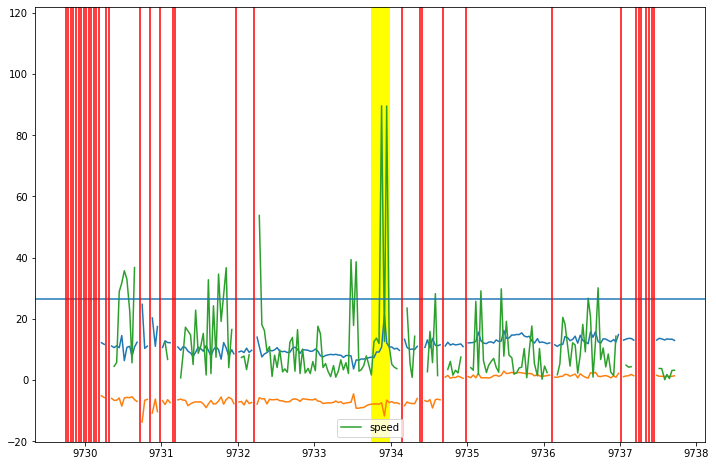

In [16]:
plt.figure(figsize=(12, 8))
# sub_df = gaze_data[np.abs(gaze_data.index - 8058.61179) < 4]
sub_df = gaze_data[np.abs(gaze_data.index - 9733.74698) < 4]
t_start, t_end = sub_df.index[0], sub_df.index[-1]
plt.plot(sub_df.index, sub_df["raw_screen_coordinates_spherical_x_deg"].values)
plt.plot(sub_df.index, sub_df["raw_screen_coordinates_spherical_y_deg"].values)
plt.plot(sub_df.index, sub_df["speed"].values, label="speed")
thresh = get_eye_speed_outlier_threshold(gaze_data["speed"])
print(thresh)
plt.axhline(thresh)

print(np.any(np.isnan(sub_df["speed"])))

for ss, se in saccades:
    if t_start <= ss and se <= t_end:
        plt.axvspan(ss, se, color="yellow")

for i in sub_df.index:
    if pd.isna(sub_df.at[i, "raw_screen_coordinates_spherical_x_deg"]):
        plt.axvline(i, color="red")

plt.legend()

For each unit, load an array of spiking activity around each saccade.

In [22]:
spikes_around_saccades = []
window = 3 # seconds

for unit_id in V1_units.index.values:
    spike_times = session.spike_times[unit_id]
    sacc_spikes = []

    for ss, se, speak in saccades:
        ss = speak
        ss = gaze_data.index[speak]
        nearby_spikes = spike_times[np.abs(spike_times - ss) <= window]
        nearby_spikes -= ss # center at the saccade start
        sacc_spikes.append(nearby_spikes)
    
    spikes_around_saccades.append((unit_id, sacc_spikes))

    # if len(spikes_around_saccades) > 20:
        # Prevent memory errors
        # break

In [23]:
# Count discrepancy between before and after spikes to find cells that respond to saccades
window = 0.25 # seconds
mean_spike_count_diff = []

for unit_id, sacc_spikes in spikes_around_saccades:
    # TODO: Count before and after and compute % increase
    n_spike_count_diff = []

    for spike_times in sacc_spikes:
        n_after = np.sum((0 < spike_times) & (spike_times <= window))
        n_before = np.sum((-window <= spike_times) & (spike_times < 0))
        n_spike_count_diff.append(n_after - n_before)

    mean_spike_count_diff.append((unit_id, np.mean(n_spike_count_diff)))

mean_spike_count_diff.sort(key=lambda x: x[1], reverse=True)
mean_spike_count_diff[:10]

[(951811217, 2.4894398530762167),
 (951810564, 2.2984389348025713),
 (951810747, 2.1340679522497705),
 (951810459, 1.4820936639118458),
 (951812218, 1.2148760330578512),
 (951810960, 0.8953168044077136),
 (951811321, 0.7842056932966024),
 (951811082, 0.7759412304866851),
 (951811504, 0.6868686868686869),
 (951810821, 0.6804407713498623)]

In [24]:
a = [s[1] - s[0] for s in saccades]
np.min(a), saccades[np.argmax(a)]

(0.05353999999988446, (9733.74698, 9733.98051, 291659))

Text(0, 0.5, 'Saccade')

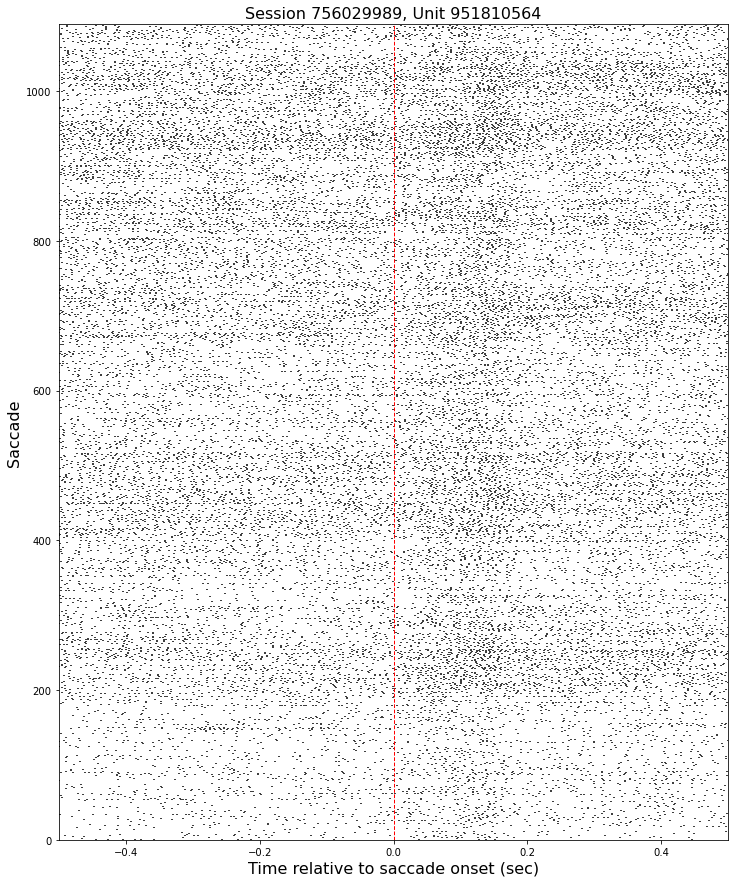

In [25]:
unit_id = mean_spike_count_diff[1][0]
# unit_id = random.choice(mean_spike_count_diff)[0]
spike_times = None

for u, t in spikes_around_saccades:
    if u == unit_id:
        spike_times = t
        break

window = 0.5
to_plot = [t[np.abs(t) < window] for t in spike_times]
plt.figure(figsize=(12, 15))
plt.eventplot(to_plot, color="black")
plt.axvline(0, color="red", linestyle="dashed", linewidth=1)
plt.xlim(-window, window)
plt.ylim(0, len(to_plot))
plt.title(f"Session {session.ecephys_session_id}, Unit {unit_id}", fontsize=16)
plt.xlabel("Time relative to saccade onset (sec)", fontsize=16)
plt.ylabel("Saccade", fontsize=16)

(array([ 685.,  682.,  694.,  692.,  734.,  726.,  718.,  725.,  689.,
         718.,  681.,  705.,  701.,  696.,  679.,  659.,  683.,  692.,
         722.,  694.,  707.,  680.,  670.,  688.,  654.,  713.,  735.,
         911.,  955., 1017., 1073., 1142., 1157.,  936.,  743.,  691.,
         676.,  715.,  741.,  734.,  736.,  739.,  734.,  751.,  741.,
         695.,  714.,  712.,  750.,  693.]),
 array([-4.99964815e-01, -4.79965976e-01, -4.59967138e-01, -4.39968300e-01,
        -4.19969461e-01, -3.99970623e-01, -3.79971785e-01, -3.59972947e-01,
        -3.39974108e-01, -3.19975270e-01, -2.99976432e-01, -2.79977593e-01,
        -2.59978755e-01, -2.39979917e-01, -2.19981079e-01, -1.99982240e-01,
        -1.79983402e-01, -1.59984564e-01, -1.39985725e-01, -1.19986887e-01,
        -9.99880488e-02, -7.99892105e-02, -5.99903722e-02, -3.99915339e-02,
        -1.99926956e-02,  6.14264945e-06,  2.00049809e-02,  4.00038192e-02,
         6.00026575e-02,  8.00014958e-02,  1.00000334e-01,  1.199991

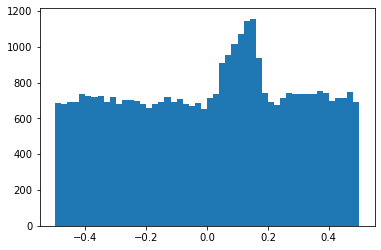

In [26]:
# Plot PSTH
hist_plot = []

for times in to_plot:
    hist_plot.extend(times)

plt.hist(hist_plot, bins=50)

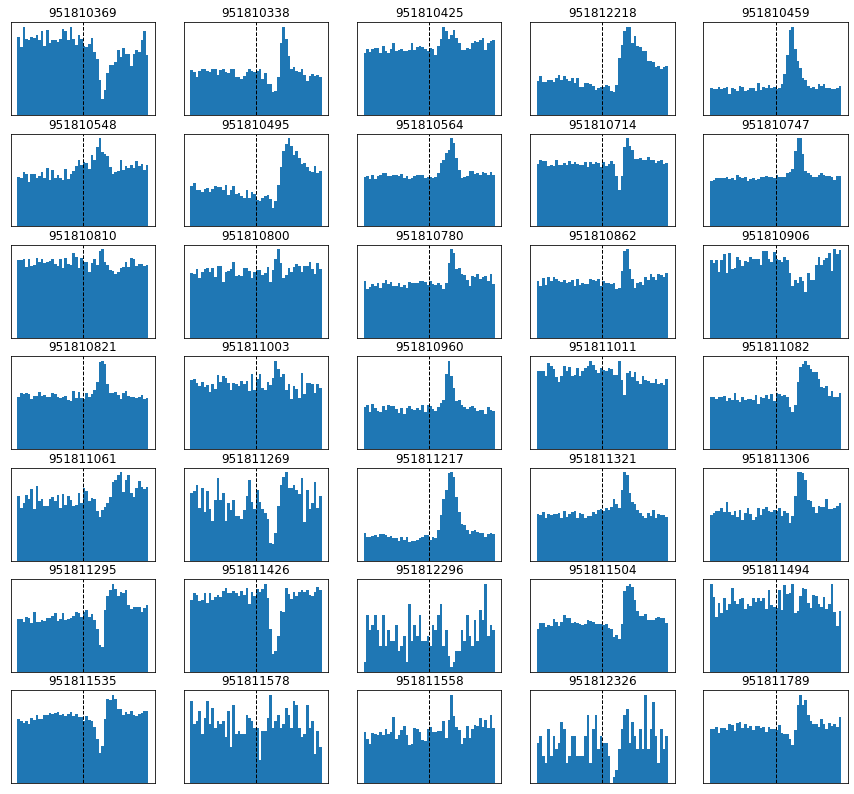

In [34]:
nrows = 7
ncols = 5
window = 0.5
fig = plt.figure(figsize=(ncols*3, nrows*2))

for i, (unit_id, spike_times) in enumerate(spikes_around_saccades[:nrows*ncols]):
    hist = []
    for times in spike_times:
        hist.extend(times[np.abs(times) < window])
    ax = fig.add_subplot(nrows, ncols, i+1)
    ax.hist(hist, bins=50)
    ax.set_title(f"{unit_id}")
    ax.axvline(0, color="black", linestyle="dashed", linewidth=1)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)


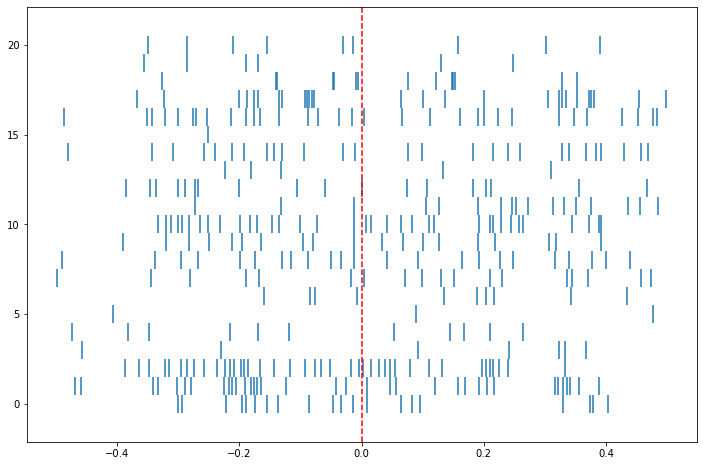

In [23]:
# Choose a random saccade
import random
ss, se = random.choice(saccades)
unit_spikes = []
window = 0.5

units_to_plot = [x[0] for x in mean_spike_count_diff[:40]]

for unit_id in units_to_plot:
    spike_times = session.spike_times[unit_id]
    nearby_spikes = spike_times[np.abs(spike_times - ss) <= window]
    nearby_spikes -= ss # center at the saccade start
    unit_spikes.append(nearby_spikes)

    if len(unit_spikes) > 20:
        break

plt.figure(figsize=(12, 8))
plt.eventplot(unit_spikes)
plt.axvline(0, color="red", linestyle="dashed")

Playground for firing rates

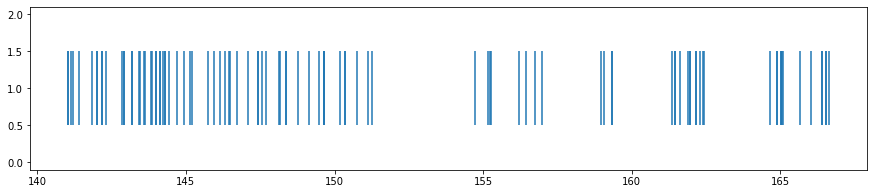

In [27]:
unit_id = spikes_around_saccades[0][0]
spike_times = session.spike_times[unit_id][500:600]

plt.figure(figsize=(15, 3))
plt.eventplot(spike_times)

In [ ]:
rolling(3000, center=True, min_periods=1, win_type='gaussian')